Prvi del najinega projekta

In [2]:
import random
import sage.graphs.graph_plot
from sage.graphs.base.boost_graph import *
import numpy

Funkcija, ki nam vrne c-je kot seznam seznamov

In [3]:
def seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena):
    sur_podatki = []
    for i in range(0, st_opazanj):
        mer_povezav = []
        for j in range(0, st_pov_grafa):
            mer_povezav.append(random.uniform(min_cena, max_cena))
        sur_podatki.append(mer_povezav)
    return(sur_podatki)

print(seznam_cen(5, 10, 0, 10))

[[1.6355345769338714, 8.769410460466553, 3.455845981395841, 0.008087894695270048, 8.77242180613598, 7.9132298479769805, 9.707377222229356, 0.8384898345268155, 1.818892832905502, 5.773007514622455], [5.856911350230449, 9.592463365847507, 5.805183172607431, 0.036008316473651325, 1.9165310462171337, 5.198731588902695, 4.3440526676451015, 2.777728569978958, 4.8206105209365475, 6.710964787470396], [7.456108512045652, 9.714963336639762, 6.094000285358146, 8.572734560598072, 1.77717335652943, 8.932770336543141, 1.9392233137490111, 9.01603323972299, 3.5955986635588513, 4.904511753072343], [7.160816626615411, 3.00469527719191, 9.642250004704861, 9.658751219204703, 8.96047465962216, 7.086857457456677, 6.0011767063851265, 7.317306939049405, 7.089790389884023, 3.5907218196558155], [7.705881885098521, 8.076609755016532, 4.210985916953803, 1.6959013658264566, 3.7282618556933347, 2.7095939885100853, 9.147908764921537, 7.853054874904482, 1.290346672428413, 5.499502806192471]]


Funkcija, ki nam zmnoži vektor z transponiranim vektorjem

In [4]:
def mnoz(vektor1, vektor2):
    matrika = []
    for i in range(0,len(vektor1)):
        vrstica =[]
        for j in range(0, len(vektor2)):
            vrstica.append(vektor1[i] * vektor2[j])
        matrika.append(vrstica)
    return(matrika)

Kovariancna matrika

In [6]:
def kov_matrika(vse_utezi):
    avr_pov = [i * 1/len(vse_utezi) for i in [sum(x) for x in zip(*vse_utezi)]]
    zac_mat = numpy.matrix(mnoz(numpy.subtract(vse_utezi[0],avr_pov),numpy.subtract(vse_utezi[0],avr_pov)))
    for i in range(1, len(vse_utezi)):
        zac_mat += numpy.matrix(mnoz(numpy.subtract(vse_utezi[i],avr_pov),numpy.subtract(vse_utezi[i],avr_pov)))
    kon_mat = 1/len(vse_utezi)*zac_mat
    return(kon_mat)

#diagonala:
#numpy.diag(testna_kov_mat)


Generiramo sosednosti (vozlišča za graf)

In [7]:
def nakljucno_vozlisce(st_vozlisc1):
    start = random.randint(0, st_vozlisc1)
    end = random.randint(0,st_vozlisc1)
    if start == end:
        return nakljucno_vozlisce(st_vozlisc1)
    else:
        return[start, end]

#nakljucno_vozlisce(ggrafi[8])

def vsa_vozlisca(koliko, st_pov1):
    vozlisca = []
    for i in range(0, st_pov1):
        x = nakljucno_vozlisce(koliko)
        while x in vozlisca:
            x = nakljucno_vozlisce(koliko)
        vozlisca.append(x)
    return vozlisca

Generiramo naključen graf:

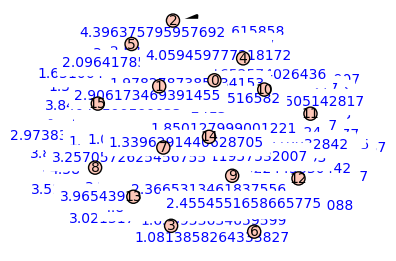

In [8]:
def graf(st_opazanj, st_vozlisc, st_pov_grafa, min_cena, max_cena):
    utezi2 = seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena)
    #graf_seznam = graphs.RandomGNM(st_vozlisc, st_pov_grafa).edges(labels=False)
    graf_seznam =  vsa_vozlisca(st_vozlisc, st_pov_grafa)
    nov = [] #najprej spremeniva v list
    for i in range(0,len(graf_seznam)):
        nov.append(list(graf_seznam[i]))
    konec = [] #dodava še ceno, v obliki ki jo sprjema digraph
    seznam_gra = []
    for j in range(0,len(utezi2)):
        zadnji = []
        for i in range(0,len(nov)):
            vmesni = []
            vmesni.append(nov[i][0])
            vmesni.append(nov[i][1])
            vmesni.append(utezi2[j][i])
            zadnji.append(tuple(vmesni))
        konec.append(zadnji)
        gr = DiGraph(zadnji)
        seznam_gra.append(gr)
    #seznam_gra[0].show(edge_labels = True)
    return(seznam_gra, utezi2)

((graf(5, 15, 150, 1, 5))[0][0]).show(edge_labels = True)

Vektorji poti x

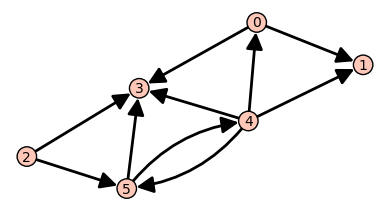

[[0, 0, 0, 1, 0, 0, 0, 0, 0, 1]]

In [9]:
def vektorcki_x(graf, zacetno, koncno):
    vse_poti = graf.all_paths(zacetno, koncno, use_multiedges=True, report_edges=False, labels=False)
    vse_povezave = graf.edges()
    par = []
    for i in range(0,len(vse_povezave)):
        par.append(vse_povezave[i][0:2])
    seznam_vektorjev = []
    for i in range(0, len(vse_poti)):
        pot = (vse_poti[i])
        prvi_oklepaj1 = list(zip(pot, pot[1:] + pot[:1]))
        prvi_oklepaj = prvi_oklepaj1[:-1]
        x=[]
        for i in range(0, len(par)):
            if par[i] in prvi_oklepaj:
                x.append(1)
            else:
                x.append(0)
        seznam_vektorjev.append(x)
    return(seznam_vektorjev)

x = ((graf(5, 5, 10, 1, 5))[0][0])
x.show()
vektorcki_x(x, 2, 4)

Izračunamo ceno določene poti

In [11]:
def povprecje(cene1):
    seznam_cen = list(cene1.values())
    povprecne_cene = []
    for i in range(0, len(seznam_cen)):
        povprecne_cene.append(numpy.average(seznam_cen[i]))
    return(povprecne_cene)


def vektor_skalarni_produkt(cene1, start, end, graf):
    cene_poti = {}
    for i in range(0,len(cene1)):
        x = vektorcki_x(graf[0], start, end)
        vmesni = []
        for j in range(0,len(x)):
            vmesni.append(numpy.dot(cene[i], x[j]))
        cene_poti[i] = vmesni
    return




Naivni algoritem

In [127]:
#prvo narediva vektorja xr in xl, za začetek najinega algoritma
#def graf(st_opazanj, st_vozlisc, st_pov_grafa, min_cena, max_cena)

[seznam_gra, utezi] = graf(5, 10, 30, 1, 5)
d = numpy.diag(kov_matrika(utezi))
avr_pov = [i * 1/len(utezi) for i in [sum(x) for x in zip(*utezi)]]
E = 0.3

x = vektorcki_x(seznam_gra[0], 1, 7)

vektor_xl =  numpy.add(numpy.dot((1-E), numpy.array(avr_pov)), numpy.dot(E,numpy.array(d)))
#print(vektor_xl)
xl= numpy.dot(vektor_xl, numpy.array(x[0]))
#print(xl)

vektor_xr = numpy.add(numpy.dot(E, numpy.array(avr_pov)), numpy.dot((1-E),numpy.array(d)))
xr= numpy.dot((vektor_xr), numpy.array(x[0]))
#print(xr)

In [126]:
def najmanjsi_x(seznam_x, vektor):
    najmanjsi_x = seznam_x[0]
    najmanjsi_skalarni_produkt = numpy.dot(vektor, numpy.array(seznam_x[0]))
    for i in range(1,len(seznam_x)):
        vrednost = numpy.dot(vektor, numpy.array(seznam_x[i]))
        if vrednost < najmanjsi_skalarni_produkt:
            najmanjsi_skalarni_produkt = vrednost
            najmanjsi_x = seznam_x[i]
    return(najmanjsi_x)

najmanjsi_xl = najmanjsi_x(x, vektor_xl)
najmanjsi_xr = najmanjsi_x(x, vektor_xr)
print(najmanjsi_xl)
print(najmanjsi_xr)


[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [14]:
import sys
sys.setrecursionlimit(10000)
print(sys.getrecursionlimit())


10000


In [122]:
uer = []
def razisci(x0, x1, pov, diag, poti):
    if x0 == x1:
        print("x0 in x1 sta enaka.")
    alfa_m = numpy.dot(diag,numpy.subtract(x1,x0)) / numpy.dot(numpy.subtract(pov,diag),numpy.subtract(x0,x1))
    vek_zv = numpy.add(numpy.dot(alfa_m, numpy.array(pov)), numpy.dot((1-alfa_m),numpy.array(diag)))
    x_zv = najmanjsi_x(poti, vek_zv)
    #print(numpy.dot(vek_zv, x_zv))
    #print(numpy.dot(vek_zv, x0))
    if numpy.dot(vek_zv, x_zv) < numpy.dot(vek_zv, x0):
        print(0)
        uer.append(x_zv)
        return(razisci(x0, x_zv, pov, diag, poti) and razisci(x_zv, x1, pov, diag, poti))
    else:
        print(1)
        uer.append(x0)
    return(uer)

#print(x)
#print(len(x))
uc_res = razisci(najmanjsi_xl, najmanjsi_xr, avr_pov, d, x)
print(uc_res)

x0 in x1 sta enaka.
1
[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


<ipython-input-122-d89194e95909>:5: RuntimeWarning: invalid value encountered in double_scalars
  alfa_m = numpy.dot(diag,numpy.subtract(x1,x0)) / numpy.dot(numpy.subtract(pov,diag),numpy.subtract(x0,x1))
